# Stroke Prediction using Machine Learning

#### Problem Statement:If the patient suffered from a stroke disease or not.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import math
import statistics
from scipy import stats
import missingno as msno
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

### 1.Check the shape/dimension of the dataset

In [3]:
print('In this dataset, No.of.rows are :',df.shape[0])
print('In this dataset, No.of.columns are :',df.shape[1])

In this dataset, No.of.rows are : 5110
In this dataset, No.of.columns are : 12


### 2.Check for the missing values.Display number of missing values per column.

In [4]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

<AxesSubplot:>

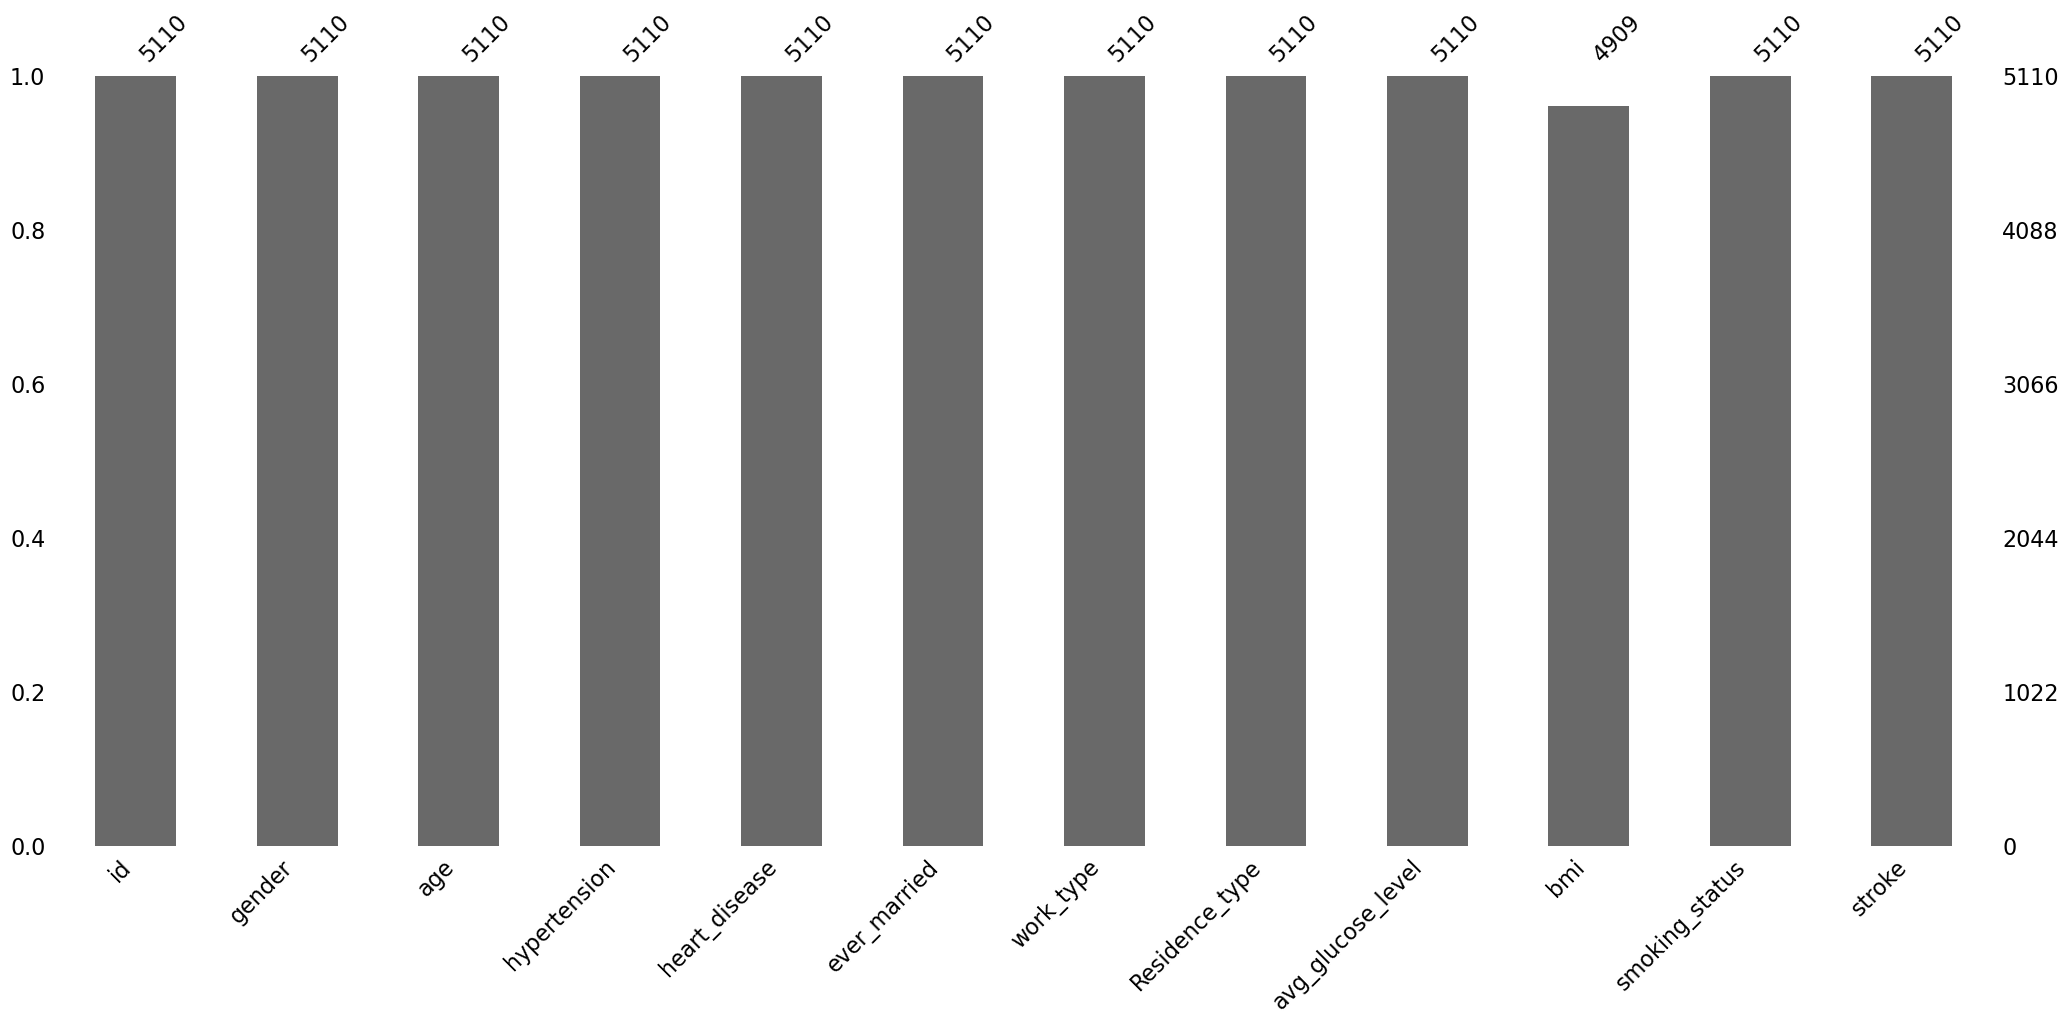

In [5]:
msno.bar(df)

### 3. Check the datatype, number of non null values and name of each variable in the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### 4. Check the descriptive statistics of the dataset.

In [7]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


### 5.Visulaiztion

**Visualize the proportion of Stroke samples in the dataset.**

In [8]:
df.stroke.value_counts(normalize=True)*100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

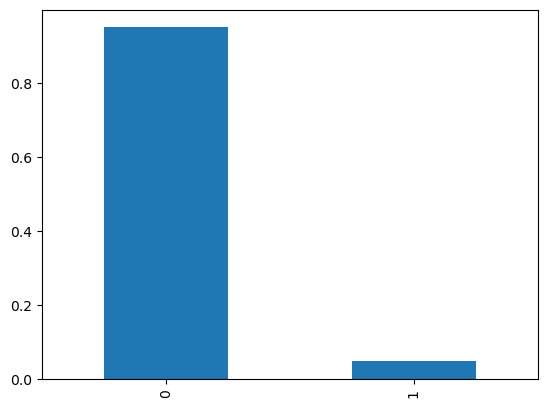

In [9]:
df.stroke.value_counts(normalize=True).plot(kind='bar')
plt.show()

**Visualize the Distribution of Male and Female Ages. Write the Observation**

In [10]:
df.groupby('gender')['age'].mean()

gender
Female    43.757395
Male      42.483385
Other     26.000000
Name: age, dtype: float64

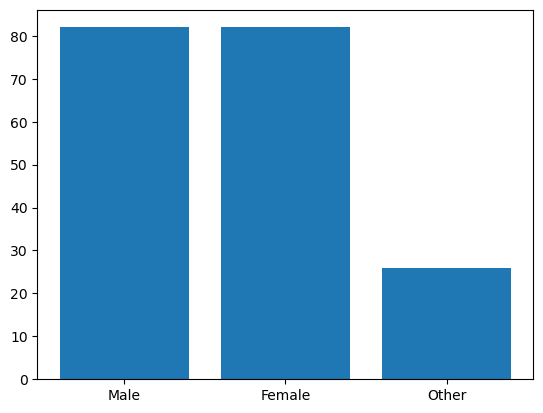

In [11]:
plt.bar(df['gender'],df['age'])
plt.show()

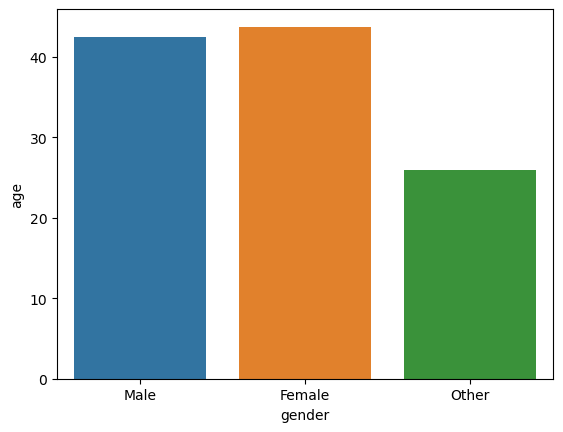

In [12]:
sns.barplot(df['gender'],df['age'],ci=0)
plt.show()

* The max age of male is 82 the average age of male is 42
* The max age of female is 82 the average age of female is 43
* The max age of other is 28 the average age of other is 26

**Visualize the stroke sample based on BMI and Glucose Level**

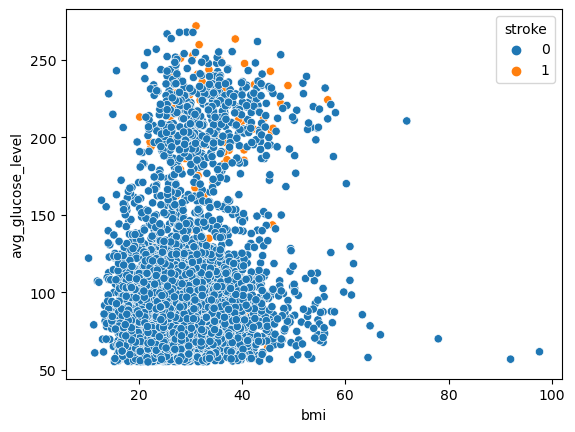

In [13]:
sns.scatterplot(df.bmi,df.avg_glucose_level,hue = df.stroke)
plt.show()

**Visualize the stroke sample based on BMI and Age**

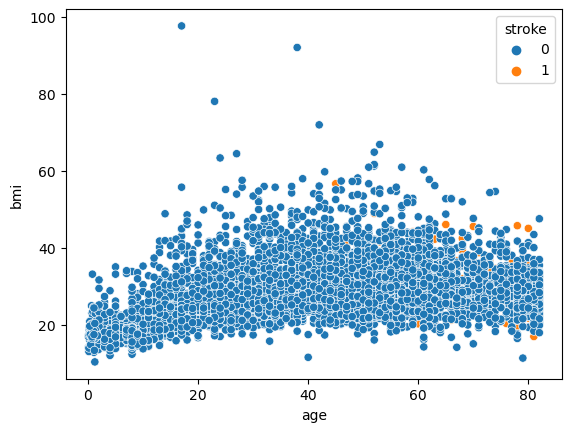

In [14]:
sns.scatterplot(df.age,df.bmi,hue = df.stroke)
plt.show()

**Using the pie chart visualizes the proportion of different smoking categories among the stroke population.**

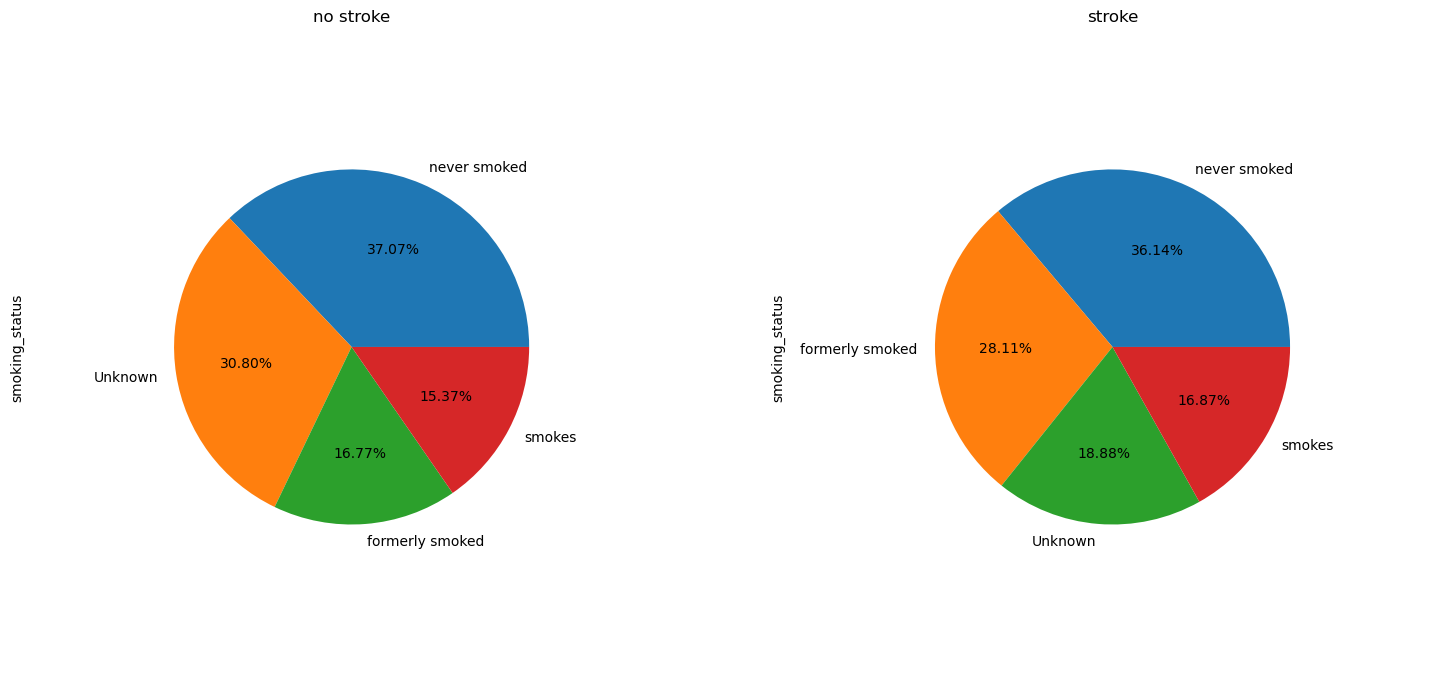

In [15]:
fig,axes = plt.subplots(1,2,figsize=(18,9))
df['smoking_status'][(df['stroke']==0)].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[0],radius=0.7,title='no stroke')
df['smoking_status'][(df['stroke']==1)].value_counts().plot(kind='pie',autopct='%0.2f%%',ax=axes[1],radius=0.7,title='stroke')
plt.show()

 **Univariate**

In [16]:
d = df.select_dtypes(include='O').columns

In [17]:
e = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']

**Categorical**

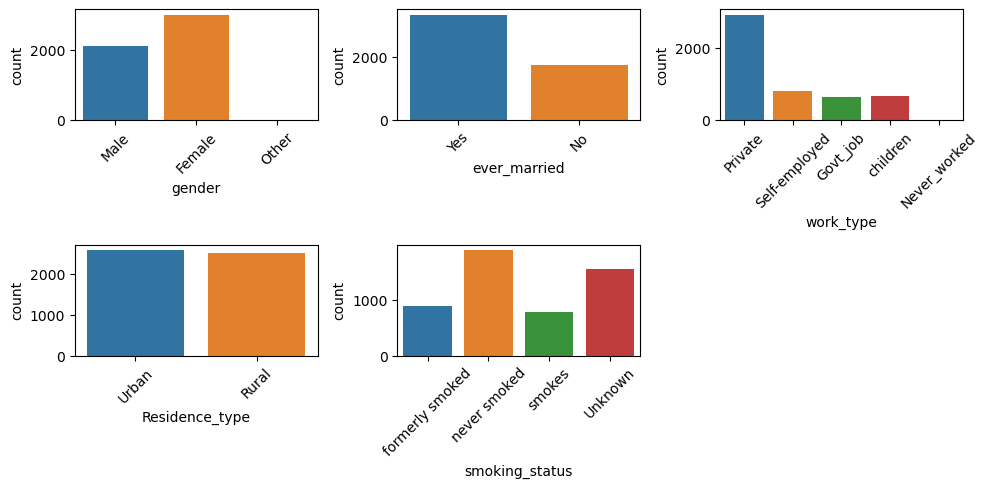

In [18]:
plt.figure(figsize=(10,5))
nr = 2
nc = 3
c = 1
for i in d:
    plt.subplot(nr,nc,c)
    sns.countplot(data =df,x=i)
    c+=1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

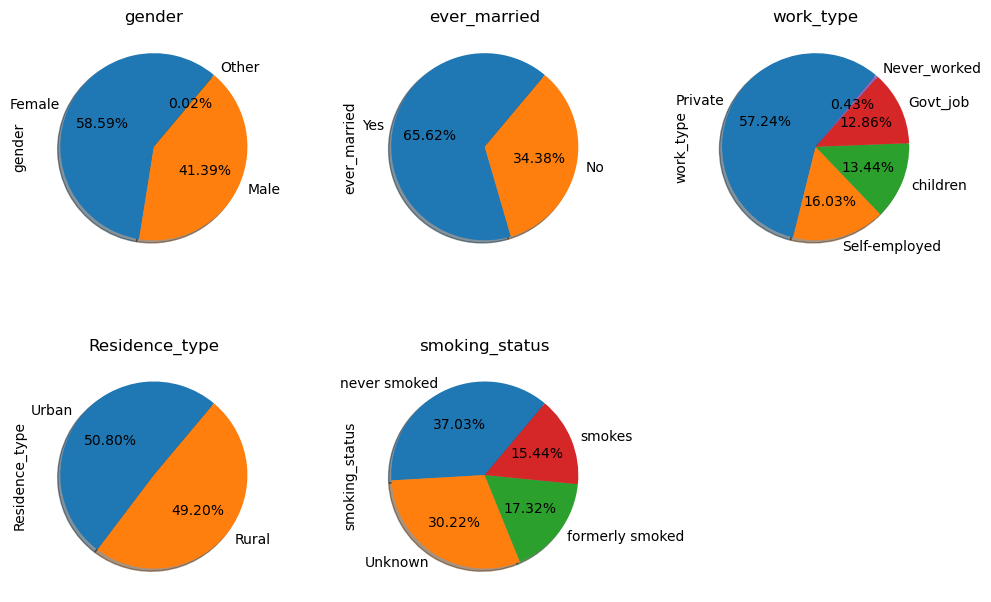

In [19]:
plt.figure(figsize=(10,10))
c=1
for i in df.select_dtypes(include="O"):
    plt.subplot(3,3,c)
    (df[i].value_counts(normalize=True)*100).plot(kind='pie',autopct='%.2f%%',startangle=50,shadow=True)
    plt.title(i)
    plt.tight_layout()
    c+=1
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

* As There are Three sub-category in the gender category data.Gender is the maximum contributor according to the dataset  i.e 59%.
* In ever_married features 66% of the peoples are married according to the dataset.
* In work types features most number of employess are from private background i.e 57% are from private back which followed by
*  Goverment job(13%) and self_employed(16%).Least is those people who never worked.

* There are equal number of people who lived in urban and Rurak area.
* In the smoking status 38% of people are those who never smoked and least is those people whi smoked i.e15%

**Numerical**

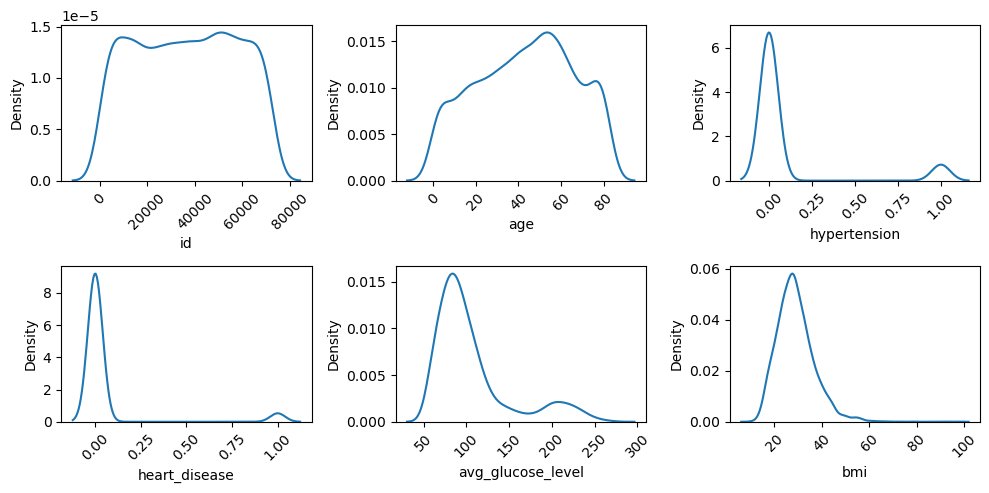

In [20]:
plt.figure(figsize=(10,5))
nr = 2
nc = 3
c = 1
for i in e:
    plt.subplot(nr,nc,c)
    sns.kdeplot(data =df,x=i)
    c+=1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**CAT vs CAT**

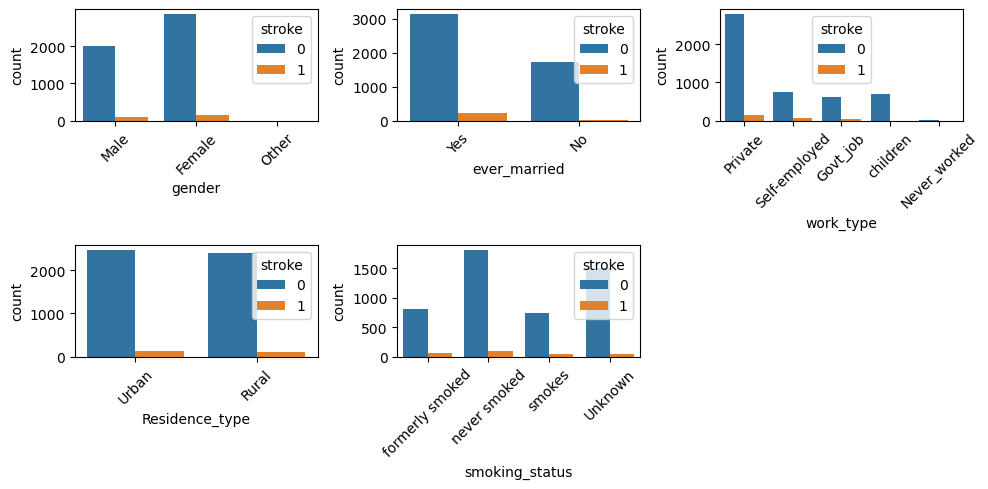

In [21]:
plt.figure(figsize=(10,5))
nr = 2
nc = 3
c = 1
for i in d:
    plt.subplot(nr,nc,c)
    sns.countplot(data =df,x=i,hue='stroke')
    c+=1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

**Num vs Cat**

In [22]:
df.select_dtypes(include=np.number).columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'stroke'],
      dtype='object')

In [23]:
df1   = df.copy(deep=True)

In [24]:
a = {1:'yes',0:'no'}

In [25]:
df1.stroke = df1.stroke.map(a)

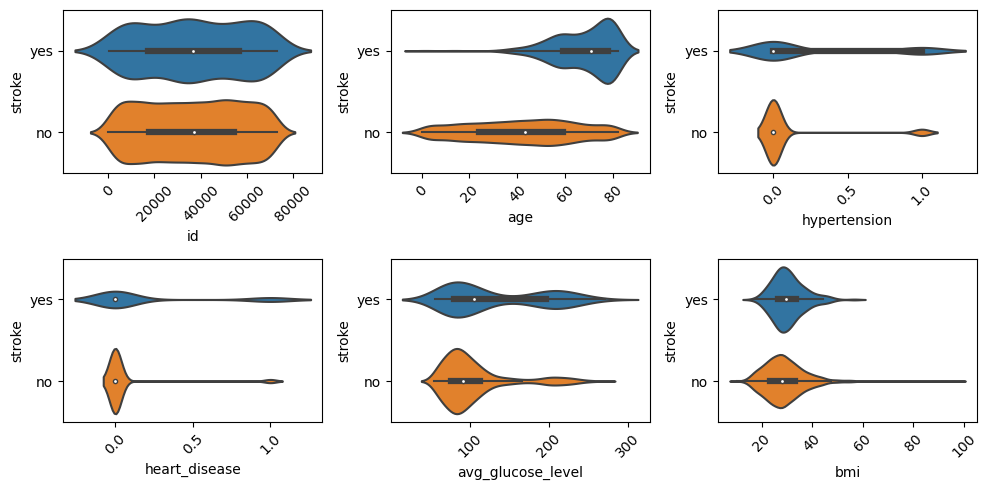

In [26]:
plt.figure(figsize=(10,5))
nr = 2
nc = 3
c = 1
for i in e:
    plt.subplot(nr,nc,c)
    sns.violinplot(data =df1,x=i,y='stroke')
    c+=1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### Infernce
* In Age vs Stroke age between 30 to 75 are highly chances of comming stroke.
* As blood glucose is increasing the chances of stroke is also increasing.
* Body Mass Index between 25 to 30 are highly changes of comming stroke.

In [27]:
num1  = ['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level','bmi']

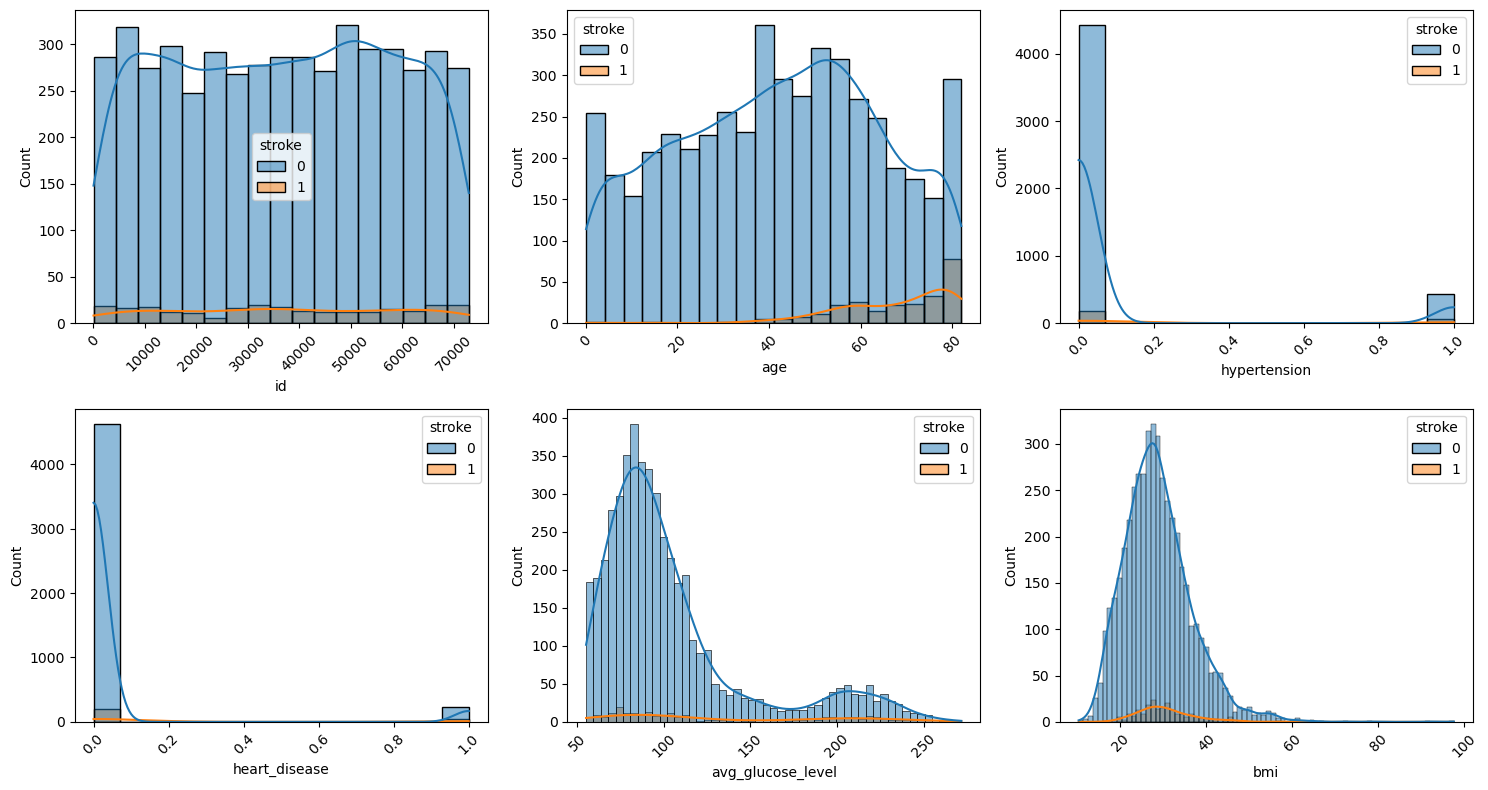

In [28]:
plt.figure(figsize=(15,8))
nrows= 2
ncols= 3
it = 1
for i in num1:
    plt.subplot(nrows,ncols,it)
    sns.histplot(data = df,x =i,hue ='stroke',kde=True)
    it = it + 1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 6. Outlier Detection

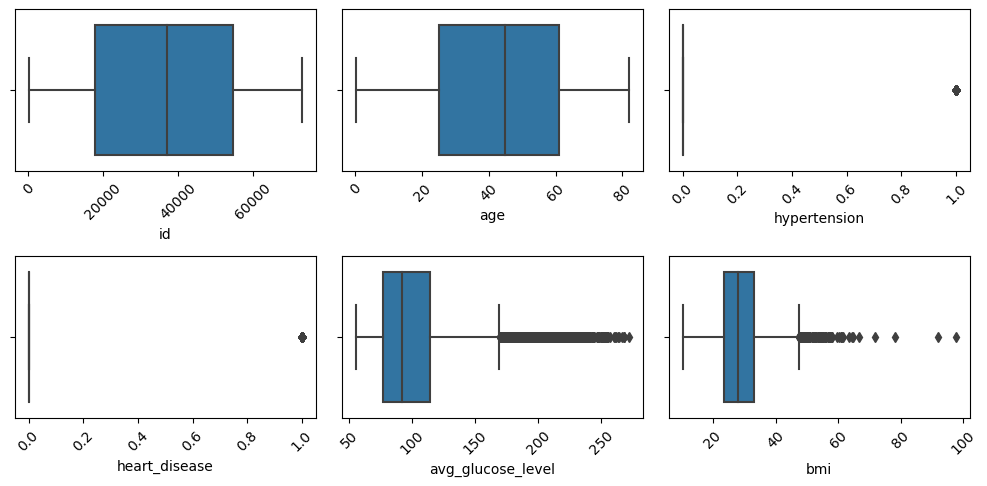

In [29]:
plt.figure(figsize=(10,5))
nr = 2
nc = 3
c = 1
for i in e:
    plt.subplot(nr,nc,c)
    sns.boxplot(data =df,x=i)
    c+=1
    plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

### 7.Correlation

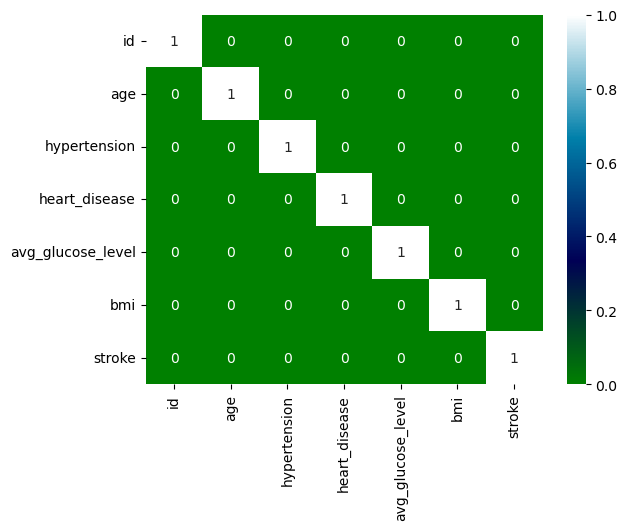

In [30]:
sns.heatmap(np.abs(df.corr())>0.7,annot=True,cmap = 'ocean')
plt.show()

* No column is higly correlated
* There is no column is highly correlated even when the correlation is set at as high as 0.7

### 8. Checking for null values

In [31]:
df.isnull().sum() 

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### 9.Checking for Skewness

In [32]:
for i,j in zip(df.skew().index,df.skew().values):
    if np.abs(j)>1:
        print(f'{i:18}:{round(j,4):8}')

hypertension      :  2.7154
heart_disease     :  3.9472
avg_glucose_level :  1.5723
bmi               :  1.0553
stroke            :  4.1933


In [33]:
df.skew()

id                  -0.019913
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
avg_glucose_level    1.572284
bmi                  1.055340
stroke               4.193284
dtype: float64

### 10 .Checking for Kurtosis

In [34]:
for i,j in zip(df.kurt().index,df.kurt().values):
    if np.abs(j)>1:
        print(f'{i:18}:{round(j,4):8}')

id                : -1.2124
hypertension      :  5.3755
heart_disease     : 13.5861
avg_glucose_level :  1.6805
bmi               :  3.3627
stroke            : 15.5897


### 11. Missing value Treatment

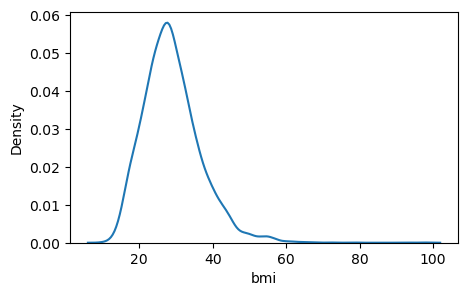

In [35]:
plt.figure(figsize=(5,3))
sns.kdeplot(df.bmi)
plt.show()

* The data is right skewed filling all the missing with median

In [36]:
df.bmi.fillna(df.bmi.median(),inplace=True)

In [37]:
df.head(2)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1


In [38]:
df2 = df.copy(deep=True)

In [39]:
df2 = df2.drop(columns='id',axis=1)

In [40]:
df2.head(2)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.1,never smoked,1


### 12. Feature Engineering

In [41]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

* replace the other in denger column as female
* as it only one value the count of female is also low

In [42]:
df2.gender.replace('Other',"Female",regex=True,inplace=True)

**Label Encoding**

In [43]:
a = {'Private':0,'Self-employed':1,'children':1,'Govt_job':2,'Never_worked':-2}
b = {'Yes': 1, 'No': 0}
c = {'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1}
d = {'Urban':0,'Rural':1}
e = {'Male':0,'Female':1}

In [44]:
df2.work_type = df2.work_type.map(a)
df2.ever_married = df2.ever_married.map(b)
df2.smoking_status = df2.smoking_status.map(c)
df2.Residence_type= df2.Residence_type.map(d)
df2.gender = df2.gender.map(e)

**Binning the BMI & Age**

In [67]:
l =[]
for i in df['bmi']:
    if (i>10) & (i<24.99):
        l.append('under_weight')
    elif (i>25.00) & (i<29.99):
        l.append('normal')
    else:
        l.append('over_weight')

In [68]:
df1.bmi = l

In [69]:
df2.bmi = l

In [73]:
# Binning of the ages 

l1=[]
for i in df['age']:
    if (i<=25):
        a='young'
        l1.append(a)
    elif (i>=26) & (i<=60):
        a='adult'
        l1.append(a)
    elif (i>=61) :
        a='old'
        l1.append(a)

In [74]:
df1.age = l1

In [75]:
df2.age  = l1

**After doing the binning of age and bmi doing the Encoding**

In [76]:
df2.head(2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_over_weight,bmi_under_weight,age_old,age_young
0,0,0,1,1,0,0,228.69,2,1,1,0,1,0
1,1,0,0,1,1,1,202.21,0,1,0,0,1,0


In [51]:
df2 = pd.get_dummies(data=df2,columns=['bmi','age'],drop_first=True)

In [ ]:
# f = df2.bmi.value_counts(normalize=True)
# g = df2.age.value_counts(normalize=True)
# df2.bmi  =df2.bmi.map(f)
# df2.age = df2.age.map(g)

In [52]:
df2.head(2)

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_over_weight,bmi_under_weight,age_old,age_young
0,0,0,1,1,0,0,228.69,2,1,1,0,1,0
1,1,0,0,1,1,1,202.21,0,1,0,0,1,0


In [53]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [54]:
# ss = StandardScaler()
# df2[['age','avg_glucose_level','bmi']]=ss.fit_transform(df2[['age','avg_glucose_level','bmi']])

In [82]:
mm = MinMaxScaler()
df2[['avg_glucose_level']]=mm.fit_transform(df2[['avg_glucose_level']])

### 13.Hypothesis Testing

In [62]:
num=df2.select_dtypes(include=np.number)

**NUM vs Target**

* H0: The variable is not Significant* 
* Ha: The vaiables is Significant

In [63]:
for i in num:
    print(i)
    print(' ')
    print(stats.ttest_ind(df2[i],df2['stroke']))
    print('')

gender
 
Ttest_indResult(statistic=71.45690724251855, pvalue=0.0)

hypertension
 
Ttest_indResult(statistic=9.503622984959767, pvalue=2.4828630276395242e-21)

heart_disease
 
Ttest_indResult(statistic=1.2098297457356275, pvalue=0.22637221796027793)

ever_married
 
Ttest_indResult(statistic=83.25517820061732, pvalue=0.0)

work_type
 
Ttest_indResult(statistic=46.514912437882984, pvalue=0.0)

Residence_type
 
Ttest_indResult(statistic=58.20460590483466, pvalue=0.0)

avg_glucose_level
 
Ttest_indResult(statistic=167.4850547627959, pvalue=0.0)

smoking_status
 
Ttest_indResult(statistic=32.63726584512575, pvalue=2.4261179000798718e-222)

stroke
 
Ttest_indResult(statistic=0.0, pvalue=1.0)

bmi_over_weight
 
Ttest_indResult(statistic=44.7104175780097, pvalue=0.0)

bmi_under_weight
 
Ttest_indResult(statistic=36.515885780478186, pvalue=1.636588722445652e-274)

age_old
 
Ttest_indResult(statistic=30.34993357517624, pvalue=8.463789472415815e-194)

age_young
 
Ttest_indResult(statistic=30.10095

**CAT VS target**

#### Age vs Target

* H0: The variable is not Significant
* Ha: The vaiables is Significant

In [77]:
stats.chi2_contingency(pd.crosstab(df1['age'],df1['stroke']))

(298.682357866455,
 1.386596400195874e-65,
 2,
 array([[2390.54657534,  122.45342466],
        [1240.45870841,   63.54129159],
        [1229.99471624,   63.00528376]]))

#### Bmi vs Target
* H0: The variable is not Significant
* Ha: The vaiables is Significant

In [79]:
stats.chi2_contingency(pd.crosstab(df1['bmi'],df1['stroke']))

(40.76108342060507,
 1.4087800634289989e-09,
 2,
 array([[1505.86360078,   77.13639922],
        [1852.12661448,   94.87338552],
        [1503.00978474,   76.99021526]]))

### 14. Model Building

In [80]:
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier,RandomForestClassifier
from xgboost import XGBClassifier
# metric
from sklearn.metrics import cohen_kappa_score,accuracy_score,roc_auc_score,roc_curve
from sklearn.metrics import f1_score,confusion_matrix,classification_report
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve
from sklearn.feature_selection import RFE
# Smote
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
#stats
import statsmodels.api as sma
import statsmodels.formula.api as sfa
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [83]:
df2.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,bmi_over_weight,bmi_under_weight,age_old,age_young
0,0,0,1,1,0,0,0.801265,2,1,1,0,1,0
1,1,0,0,1,1,1,0.679023,0,1,0,0,1,0
2,0,0,1,1,0,1,0.234512,0,1,1,0,1,0
3,1,0,0,1,0,0,0.536008,-1,1,1,0,0,0
4,1,1,0,1,1,1,0.549349,0,1,0,1,1,0


In [84]:
x = df2.drop(columns='stroke',axis =1)
y = df2.stroke

In [85]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=10)

In [86]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(3577, 12)
(1533, 12)
(3577,)
(1533,)


In [87]:
df2.isnull().sum()

gender               0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
bmi_over_weight      0
bmi_under_weight     0
age_old              0
age_young            0
dtype: int64

In [88]:
smote = SMOTE(random_state=10)

In [89]:
x_s,y_s = smote.fit_resample(x,y)

**After smoting**

In [90]:
xtrains,xtests,ytrains,ytests = train_test_split(x_s,y_s,test_size=0.30,random_state=10)

* Logit Model

In [91]:
temp_trains = sma.add_constant(xtrains)
temp_tests  = sma.add_constant(xtests)

In [92]:
model = sma.Logit(ytrains,temp_trains).fit()

Optimization terminated successfully.
         Current function value: 0.503135
         Iterations 9


In [93]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 6805
Model:                          Logit   Df Residuals:                     6792
Method:                           MLE   Df Model:                           12
Date:                Sun, 11 Dec 2022   Pseudo R-squ.:                  0.2741
Time:                        16:32:54   Log-Likelihood:                -3423.8
converged:                       True   LL-Null:                       -4716.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2151      0.106      2.028      0.043       0.007       0.423
gender               -0.1987      0.062     -3.227      0.001      -0.319      -0.078
hypertension          0.0910      0.087      1.051      0.293      -0.079       0.261
heart_disease        -0.2924      0.114     -2.565      0.010      -0.516      -0.069
ever_married         -0.1391      0.086     -1.617      0.106      -0.308       0.029
work_type            -0.3301      0.043     -7.682      0.000      -0.414      -0.246
Residence_type       -0.4919      0.060     -8.252      0.000      -0.609      -0.375
avg_glucose_level     1.3077      0.135      9.681      0.000       1.043       1.572
smoking_status        0.0527      0.030      1.769      0.077      -0.006       0.111
bmi_over_weight      -0.7250      0.066    -10.996      0.000      -0.854      -0.596
bmi_under_weight     -1.0412      0.089    -11.744      0.000      -1.215      -0.867
age_old               1.4863      0.063     23.524      0.000       1.362       1.610
age_young            -4.3021      0.419    -10.273      0.000      -5.123      -3.481
=====================================================================================
"""

In [94]:
for i,j in zip(model.pvalues.index,model.pvalues.values):
    if j>0.05:
        print(f'{i:18}:{round(j,4):8}')
print('These features are not significant')

hypertension      :  0.2932
ever_married      :  0.1058
smoking_status    :  0.0769
These features are not significant


In [95]:
ypred_prob = model.predict(temp_tests)

In [96]:
ypred = [0 if i<0.5 else 1 for i in ypred_prob]

In [97]:
cm = confusion_matrix(ytests, ypred)
cm

array([[1061,  414],
       [ 335, 1107]], dtype=int64)

In [98]:
roc_auc_score(ytests,ypred)

0.7435029032182232

In [99]:
fpr,tpr,threshold = roc_curve(ytests,ypred_prob)

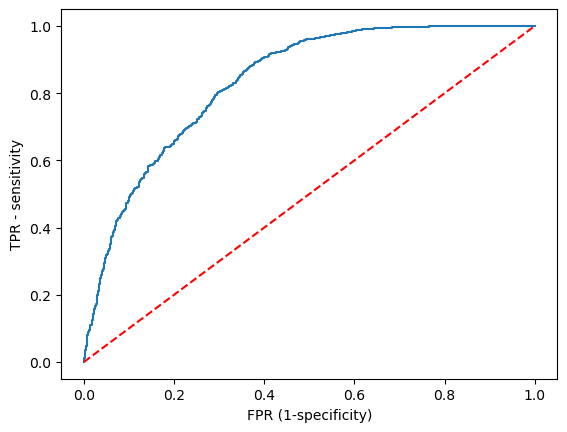

In [100]:
plt.plot(fpr,tpr)
plt.xlabel('FPR (1-specificity)')
plt.ylabel('TPR - sensitivity')
plt.plot([0,1],[0,1],'r--')
plt.show()

#### Decision Tree

In [101]:
dt  = DecisionTreeClassifier(random_state=10)

In [102]:
model_dt =  dt.fit(xtrains,ytrains)

In [105]:
ypred_dt = model_dt.predict(xtests)

In [106]:
confusion_matrix(ytests,ypred_dt)

array([[1175,  300],
       [ 251, 1191]], dtype=int64)

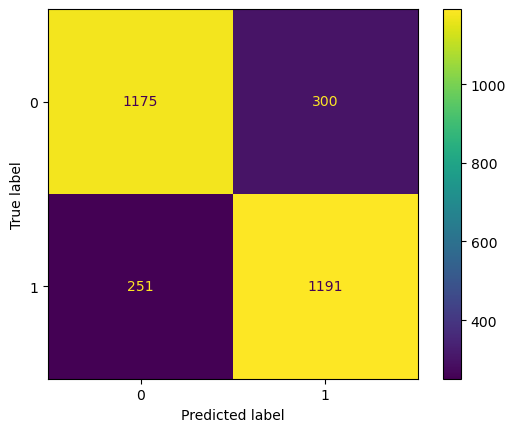

In [107]:
plot_confusion_matrix(model_dt,xtests,ytests)

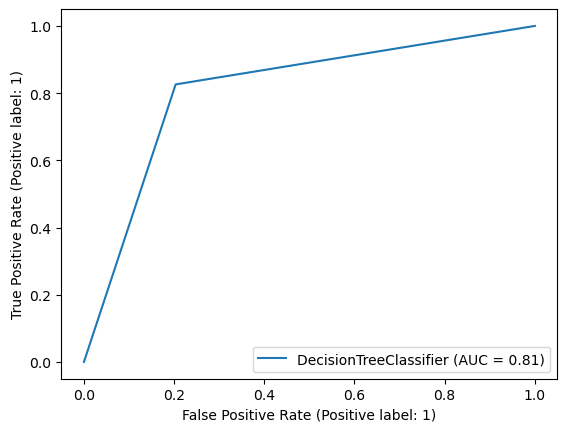

In [108]:
plot_roc_curve(model_dt,xtests,ytests)

In [109]:
print(classification_report(ytests,ypred_dt))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1475
           1       0.80      0.83      0.81      1442

    accuracy                           0.81      2917
   macro avg       0.81      0.81      0.81      2917
weighted avg       0.81      0.81      0.81      2917



In [110]:
print(model_dt.score(xtrains,ytrains))
print(model_dt.score(xtests,ytests))

1.0
0.8111073020226259


### Random Forest

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf=RandomForestClassifier(random_state=122)

In [113]:
model_rf=rf.fit(xtrains,ytrains)
ypred_rf=model_rf.predict(xtests)

In [114]:
print(classification_report(ytests,ypred_rf))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1475
           1       0.85      0.89      0.87      1442

    accuracy                           0.86      2917
   macro avg       0.87      0.87      0.86      2917
weighted avg       0.87      0.86      0.86      2917



In [115]:
model_rf.score(xtrains,ytrains)

0.9995591476855253

### KNN Model

In [116]:
kn=KNeighborsClassifier()

In [117]:
model_kn=kn.fit(xtrains,ytrains)
ypred_kn=model_kn.predict(xtests)

In [118]:
print(classification_report(ytests,ypred_kn))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      1475
           1       0.80      0.93      0.86      1442

    accuracy                           0.85      2917
   macro avg       0.86      0.85      0.85      2917
weighted avg       0.86      0.85      0.85      2917



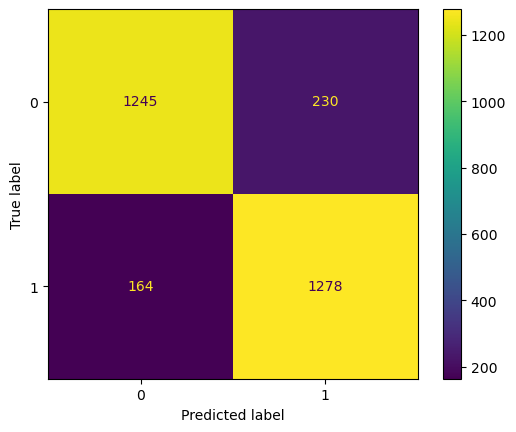

In [126]:
plot_confusion_matrix(model_rf,xtests,ytests)

### Search for Best Hyperparameter

In [120]:
rf=RandomForestClassifier(random_state=100)

In [121]:
params = {'criterion':['gini','entropy'],'max_depth':range(1,10),'n_estimators':[80,90,110,70]}
grid = GridSearchCV(rf,param_grid=params,cv=10)
grid.fit(xtrains,ytrains)
grid.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 70}

In [ ]:
#Tuned Model

In [122]:
rf=RandomForestClassifier(random_state=123,max_depth=9,criterion='gini',n_estimators=70)
tuned_model=rf.fit(xtrains,ytrains)
ypred_tuned=tuned_model.predict(xtests)

In [124]:
print(classification_report(ytests,ypred_tuned))

              precision    recall  f1-score   support

           0       0.90      0.78      0.83      1475
           1       0.80      0.91      0.85      1442

    accuracy                           0.84      2917
   macro avg       0.85      0.84      0.84      2917
weighted avg       0.85      0.84      0.84      2917



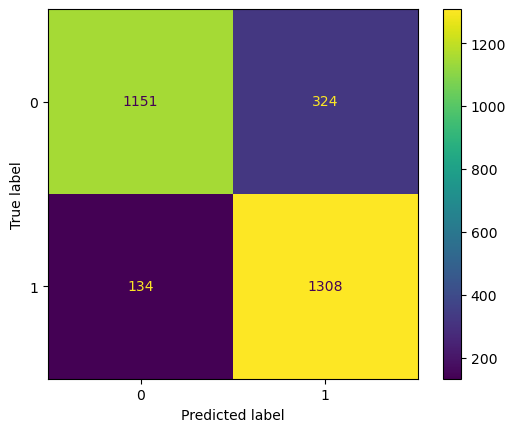

In [128]:
plot_confusion_matrix(tuned_model,xtests,ytests)
plt.show()

# Advance Model

# XGB

In [129]:
xg=XGBClassifier()

In [134]:
model_xg=xg.fit(xtrains,ytrains)
ypred_xg=model_xg.predict(xtests)

In [135]:
print(classification_report(ytests,ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1475
           1       0.81      0.87      0.84      1442

    accuracy                           0.83      2917
   macro avg       0.84      0.83      0.83      2917
weighted avg       0.84      0.83      0.83      2917



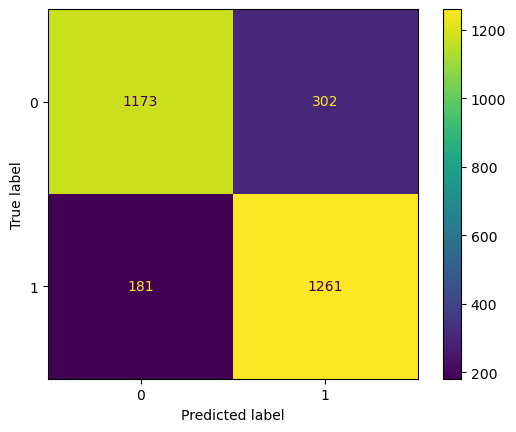

In [137]:
plot_confusion_matrix(model_xg,xtests,ytests)
plt.show()

In [139]:
print(classification_report(ytests,ypred_xg))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1475
           1       0.81      0.87      0.84      1442

    accuracy                           0.83      2917
   macro avg       0.84      0.83      0.83      2917
weighted avg       0.84      0.83      0.83      2917



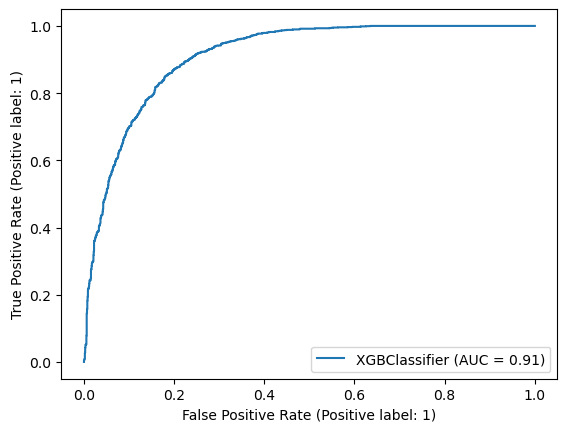

In [140]:
plot_roc_curve(model_xg,xtests,ytests)
plt.show()